# **Project Name:** Petrol Price Forecasting  using Tensor Flow

## Petrol Prices are going up continously these days and it has become very hard to predict what will be the price range in the next few months or even days.
### In this project we will try to forecast the different petrol prices for the upcoming dates given to us. 

**Importing Libraries & Dataset**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
petrolprice_df = pd.read_csv("/Users/bilaldilbar/Documents/GeorgeBrown/Projects/Petrol Price Forecasting/Dataset/train_data.csv")
petrolprice_df.head()

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


In [3]:
petrolprice_df.rename(columns={"Petrol (USD)": "Petrol Price"}, inplace=True)
petrolprice_df.head()

,Date,Petrol Price
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28


**Data Analysis**

In [4]:
petrolprice_df.shape

(813, 2)

In [5]:
petrolprice_df.describe()

,Petrol Price
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


In [6]:
petrolprice_df.dtypes

Date             object
Petrol Price    float64
dtype: object

In [7]:
petrolprice_df.isnull().sum()

Date            0
Petrol Price    2
dtype: int64

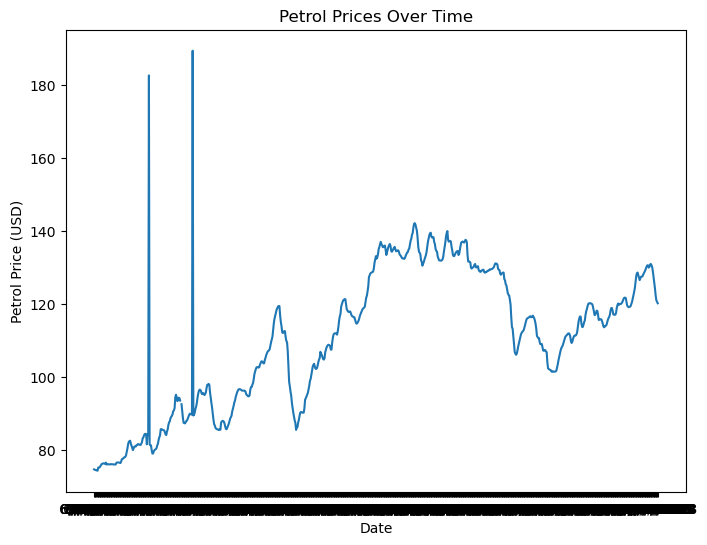

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol Price'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

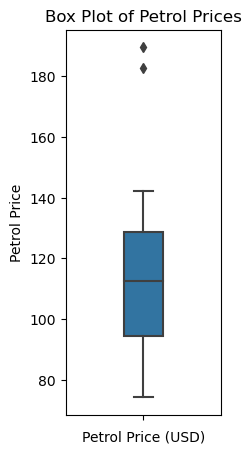

In [9]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol Price'],  width=0.25)
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

**Data Imputation**

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [11]:
imputer = IterativeImputer(max_iter=10, random_state=0)
petrolprice_df['Petrol Price'] = imputer.fit_transform(petrolprice_df[['Petrol Price']])
petrolprice_df.isna().sum()

Date            0
Petrol Price    0
dtype: int64

**Removing Outliers**

In [12]:
from sklearn.ensemble import IsolationForest

In [13]:
model = IsolationForest(contamination=0.05)
petrolprice_df['Outlier'] = model.fit_predict(petrolprice_df[['Petrol Price']])
petrolprice_df = petrolprice_df[petrolprice_df['Outlier'] != -1]

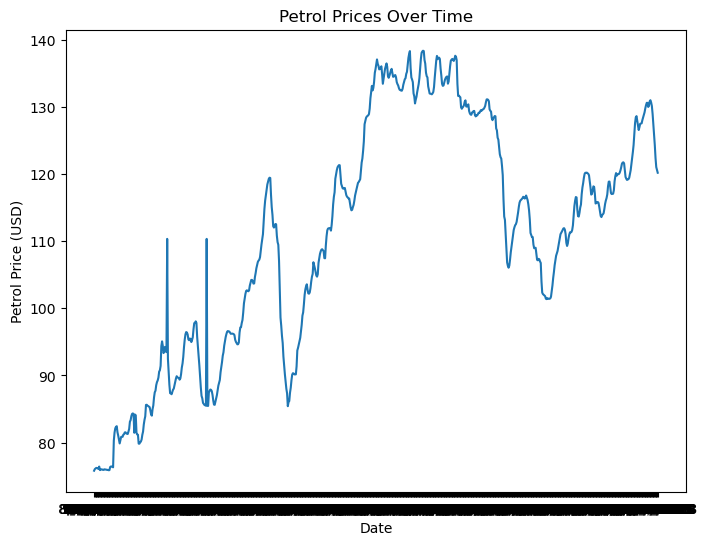

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(petrolprice_df['Date'], petrolprice_df['Petrol Price'])
plt.title('Petrol Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Petrol Price (USD)')
plt.show()

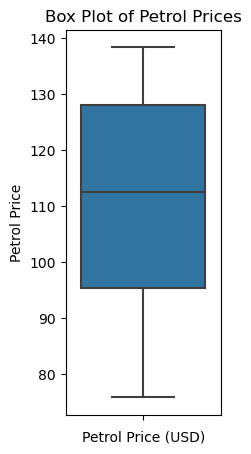

In [15]:
plt.figure(figsize=(2, 5))
sns.boxplot(y=petrolprice_df['Petrol Price'])
plt.title('Box Plot of Petrol Prices')
plt.xlabel('Petrol Price (USD)')
plt.show()

**Data Scaling**

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler(feature_range=(0,1))
petrol_price_values = petrolprice_df['Petrol Price'].values.reshape(-1, 1)
petrol_price_scaled = scaler.fit_transform(np.array(petrol_price_values))
petrolprice_df['Petrol Price Scaled'] = petrol_price_scaled
petrolprice_df.reset_index(drop=True, inplace=True)

In [22]:
petrolprice_df

,Date,Petrol Price,Outlier,Petrol Price Scaled
0,8/18/2003,75.81,1,0.000000
1,8/26/2003,76.05,1,0.003838
2,9/1/2003,76.13,1,0.005117
3,9/8/2003,76.23,1,0.006716
4,9/15/2003,76.20,1,0.006236
...,...,...,...,...
767,12/3/2018,124.30,1,0.775344
768,12/10/2018,122.37,1,0.744484
769,12/17/2018,121.02,1,0.722897
770,12/24/2018,120.61,1,0.716342


**Splitting The Data**

In [30]:
training_size = int(len(petrolprice_df) * 0.65)
train_data = petrolprice_df.iloc[:training_size, :]
test_data = petrolprice_df.iloc[training_size:, :]

In [31]:
train_data.shape

(501, 4)

In [28]:
test_data.shape

(271, 4)